#                                     Proyecto Segundo Bimestre

# Tema: Criptomonedas

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
path = ".\\proyectoFinal\\proyectoFinal\\tmp\\crypto.json"
llaves = ['Name','Market Capitalization','Price','Circulating Supply','Volume (24h)']
df = pd.read_json(
        path
    )
#df.set_index('name',inplace=True)

In [4]:
df.rename(columns={'market_cap': 'Market Capitalization',
                   'name': 'Crypto Currency',
                   'price': 'Price',
                   'supply': 'Circulating Supply',
                   'volume': 'Volume (24h)'}, inplace=True)

In [77]:
path_guardado = '.\\crypto_currency.pickle'
df.to_pickle(path_guardado)
df_pickle_guardado = pd.read_pickle(path_guardado)

# Cantidad de Criptomonedas según promedio de capitalización

In [78]:
promedio=df["Market Capitalization"].mean()
promedio

220737954.33500838

In [79]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Market Capitalization'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[39, 1155]

In [80]:
arreglo = np.array(['Mayores al promedio', 'Menores al promedio'])
arreglo

array(['Mayores al promedio', 'Menores al promedio'], dtype='<U19')

In [81]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

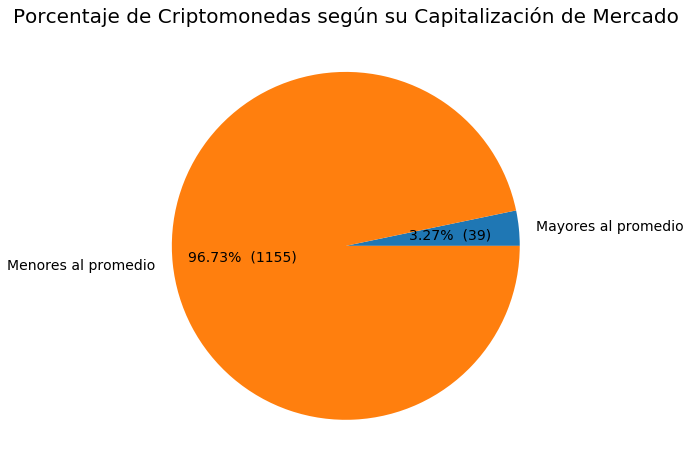

In [82]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según su Capitalización de Mercado", fontsize=20)
plt.show()

## Conclusiones
### 1) De acuerdo a lo que se observa en el gráfico, la gran mayoría de cripto monedas existentes presentan un valor menor al promedio debido a su bajo nivel de cantidad de existencias o a su precio de mercado.

### 2) La mayoría de criptomonedas existentes no representan una buena opción de inversión en el mercado, según lo revela el gráfico anterior. 

## Top Criptomonedas según su Capitalización de Mercado

In [83]:
df2 = df.sort_values(by=["Market Capitalization"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Market Capitalization")

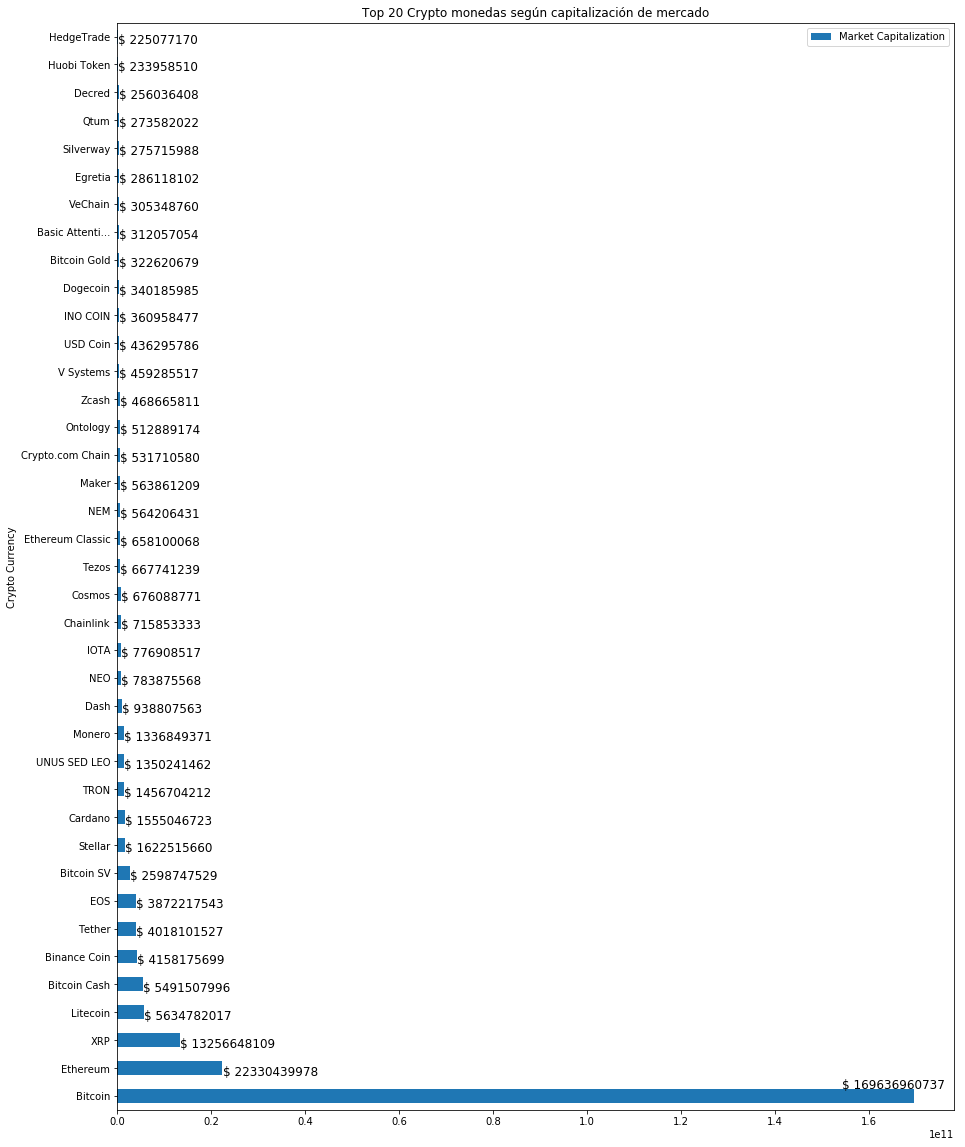

In [84]:
chart = df2.plot.barh(x = 'Crypto Currency', y='Market Capitalization', figsize=(15,20), title='Top 20 Crypto monedas según capitalización de mercado')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) En el gráfico se presenta la cúpula o cresta de cripto monedas según su capitalización de mercado, constituido por 39 cripto monedas sobre un universo de 1194, lo que representa aproximadamente el 3% del total. 

### 2) Resulta evidente en el gráfico que la concentración dentro de este segmento se la lleva una sola cripto moneda, el Bitcoin; que se muestra como 8 veces mayor que su inmediato seguido el Ethereum. Lo que significa  que el Bitcoin es prácticamente un monopolio en este mercado.

## Cantidad de cripto monedas según Precio de Mercado

In [85]:
promedio=df["Price"].mean()
promedio

11.49834854304021

In [86]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Price'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[26, 1168]

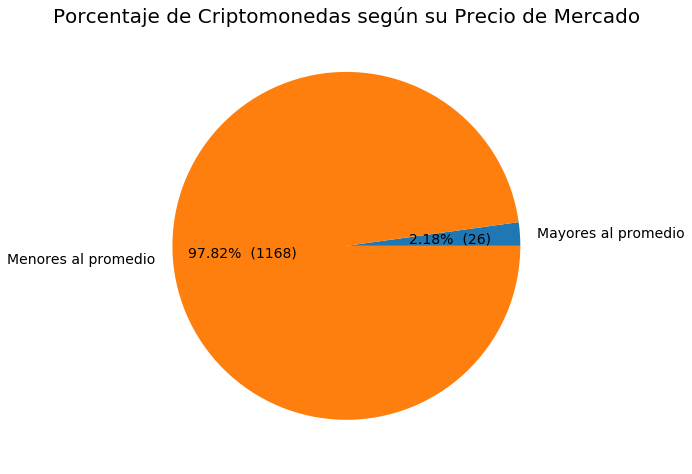

In [87]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según su Precio de Mercado", fontsize=20)
plt.show()

## Conclusiones
### 1) Según lo que se presenta en el gráfico, y tomando en cuenta que el promedio de los precios de mercado de criptomonedas es de aproximadamente 11,50 dólares, los valores que superan esta media son apenas el 2% del univero (26).

### 2) En consecuencia, se puede concluir que la mayoría de criptomonedas presentan un valor de mercado inferior a los 11 dólares, lo cual podría ser no significativo frente a un eventual valor del Bitcoin en el mercado que pueda alcanzar altísimos valores, basándose en la demostración del monopolio que se mostró en el segundo gráfico.

## Top Criptomonedas según su Precio de Mercado

In [88]:
df3 = df.sort_values(by=["Price"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Price")

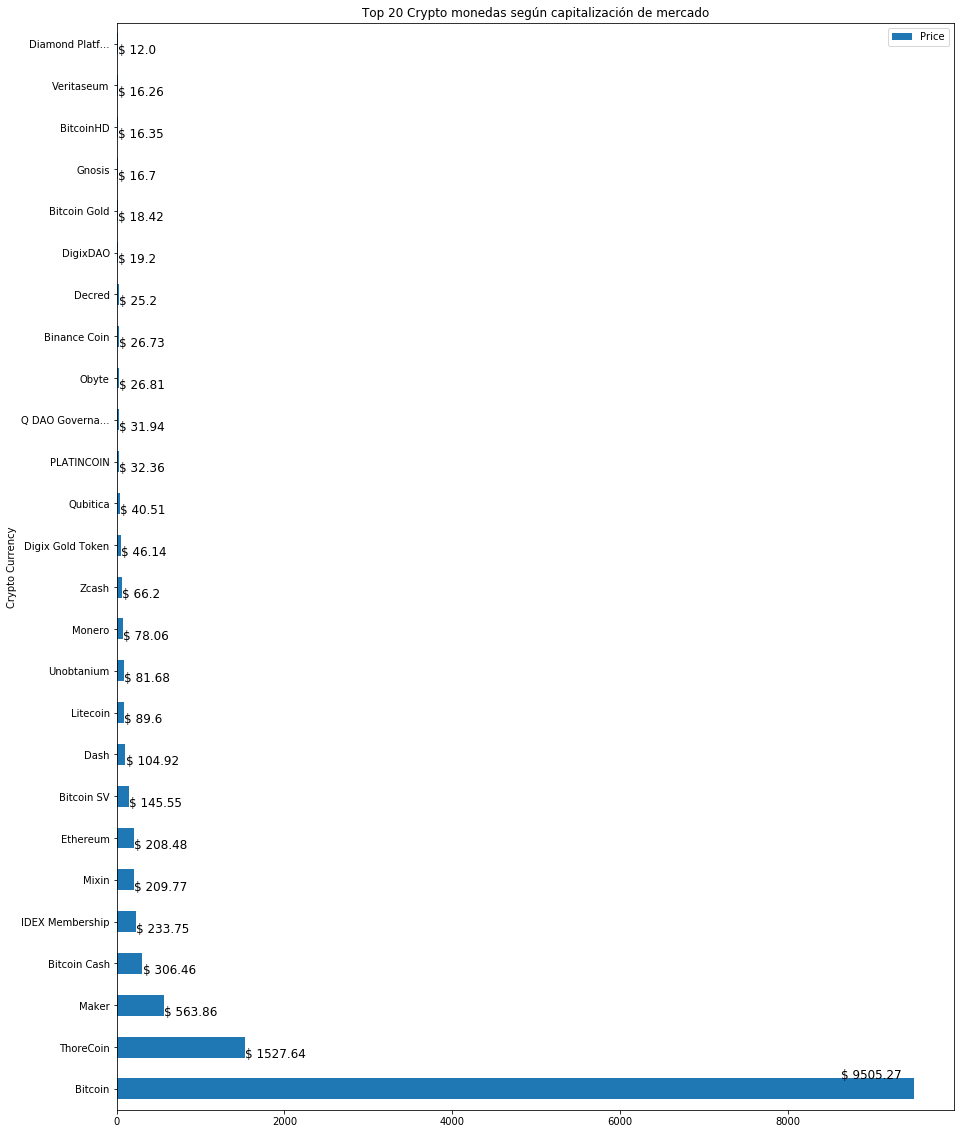

In [89]:
chart = df3.plot.barh(x = 'Crypto Currency', y='Price', figsize=(15,20), title='Top 20 Crypto monedas según capitalización de mercado')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) Con el objetivo de ratificar la percepción presentada en el gráfico anterior, en el presente se muestran los valores unitarios de las criptomonedas ubicadas en la cúpula o cresta en la modalidad de gráfico de barras, ordenadas en forma ascendente.

### 2) Resulta evidente que el Bitcoin alcanza un valor de mercado de aproxiamdamente 9500 dólares, mientras que 12 criptomonedas superan los 50 dólares y mientras 13 ni siquiera llegan a ese valor. 

### 3) Lo mencionado en párrafos anteriores demuestra, además de la concentración, una marcada preferencia del Bitcoin, así como, confirma su monopolio por precio.

## Cantidad de cripto monedas según el promedio de monedas en existencia

In [90]:
promedio=df["Circulating Supply"].mean()
promedio

34761306356.13233

In [91]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Circulating Supply'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[40, 1154]

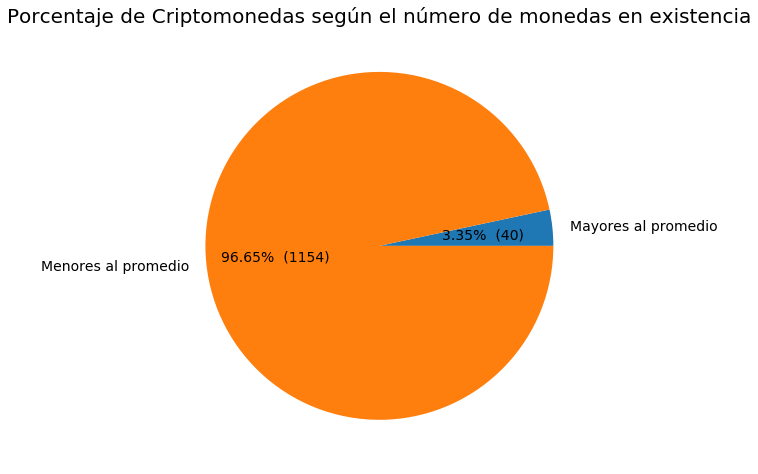

In [92]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según el número de monedas en existencia", fontsize=20)
plt.show()

## Conclusiones
### 1) En el presente gráfico de pastel relativo a al promedio de la cantidad de monedas en circulación, se observa también que apenas algo más del 3% superan este promedio, lo cual ratifica la concentración de la distribucíón.

### 2) Aproximadamente el 97% de las monedas no superan su promedio ponderado, que ronda los 34 mil millones de existecias de monedas para el comercio.

## Top Criptomonedas según el Número de monedas en existencia

In [93]:
df4 = df.sort_values(by=["Circulating Supply"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Circulating Supply")

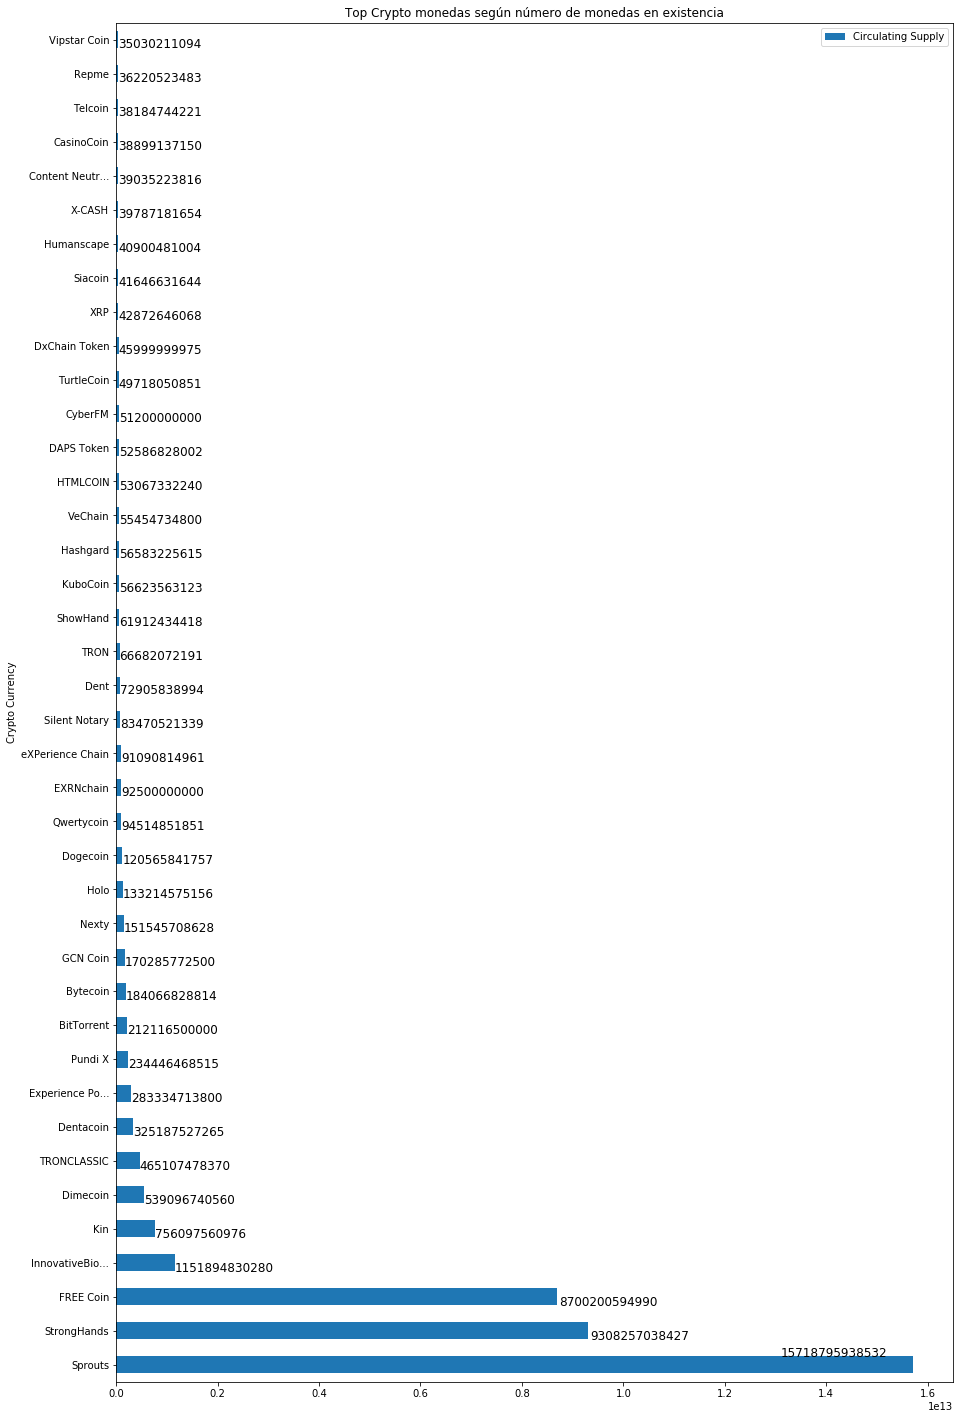

In [100]:
chart = df4.plot.barh(x = 'Crypto Currency', y='Circulating Supply', figsize=(15,25), title='Top Crypto monedas según número de monedas en existencia')
flag=True
for p in chart.patches:
    if (flag):
        chart.annotate(str(p.get_width()), (p.get_width()/1.2, p.get_y()+0.5), fontsize='large')
        flag = False
    else:
        chart.annotate(str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) Cuando nos referimos a existencias (inventarios), aparecen tres nuevas monedas de alta concentración: FREE coin, StrognHands y Sprouts, siendo esta última la más significativa al tener casi el doble de existencias que su inmediato seguidor (StrongHands).

### 2) Resulta curioso la ausencia del Bitcoin en esta cúpula, lo que demuestra su altísima circulación. 

## Cantidad de cripto monedas según el promedio de monedas que han sido negociadas en las últimas 24 horas

In [95]:
promedio=df["Volume (24h)"].mean()
promedio

37681604.06281407

In [96]:
MonCap = np.array([df_pickle_guardado['Crypto Currency'].get_values(), df_pickle_guardado['Volume (24h)'].get_values()])
Valores = [np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, np.array(MonCap[0][np.where(MonCap[1] <promedio)]).size]
Valores

[32, 1162]

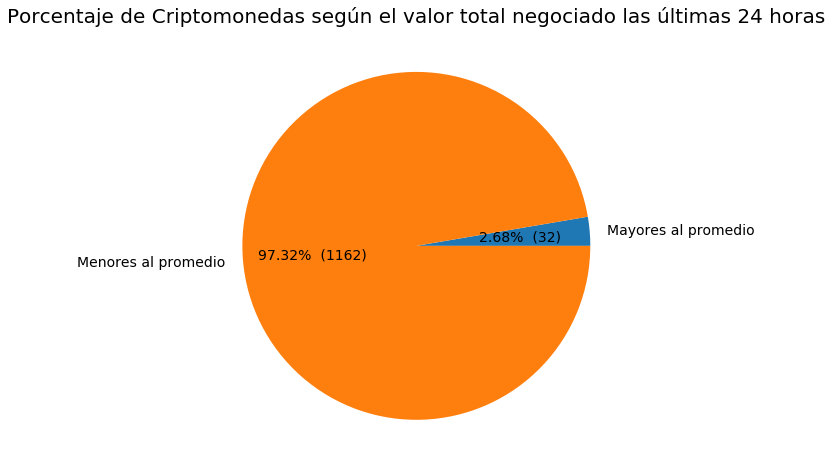

In [101]:
plt.figure(figsize=(8,8))
plt.pie(Valores, labels=arreglo, autopct=make_autopct(Valores), textprops={'fontsize': 14})
plt.title("Porcentaje de Criptomonedas según el valor total negociado las últimas 24 horas", fontsize=20)
plt.show()

## Conclusiones
### 1) De acuerdo al gráfico, y conociendo que el promedio de valor negociado las últimas 24 horas es de 37 millones de dólares, se muestra que menos del 3% del universo de criptomonedas superan el mencionado valor (32 cripto monedas).

### 2) Una vez más se demuestra que la gran mayoría de cripto monedas se ubican bajo el promedio, por lo que se evidencia un mercado elitista concentrado en criptomonedas específicas.

## Top Criptomonedas según el valor total negociado las últimas 24 horas

In [98]:
df5 = df.sort_values(by=["Volume (24h)"], ascending=False).nlargest(np.array(MonCap[0][np.where(MonCap[1] >promedio)]).size, "Volume (24h)")

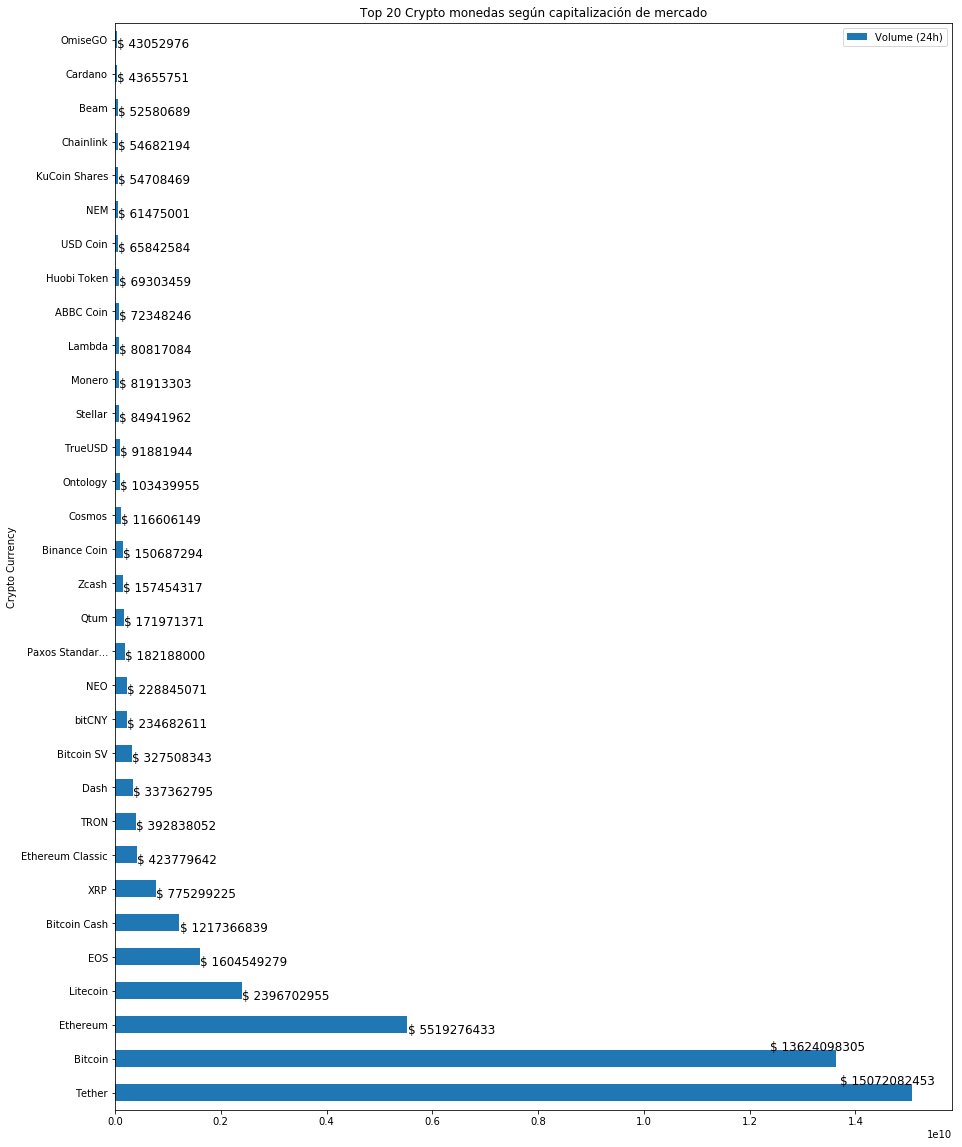

In [99]:
chart = df5.plot.barh(x = 'Crypto Currency', y='Volume (24h)', figsize=(15,20), title='Top 20 Crypto monedas según capitalización de mercado')
i=0
for p in chart.patches:
    if (i<2):
        chart.annotate('$ '+str(p.get_width()), (p.get_width()/1.1, p.get_y()+0.5), fontsize='large')
        i = i+1
    else:
        chart.annotate('$ '+str(p.get_width()), (p.get_width()* 1.005, p.get_y()* 1.0005), fontsize='large')

## Conclusiones
### 1) El presente gráfico confirma la percepción de un mercado elitista, puesto que, resulta eidente la concentración en dos criptomonedas que superan con facilidad el doble de la que se encuentra en tercer lugar.

### 2) La cripto moneda más negociada en las últimas 24 horas es el Tether con aproximademente 15 millones de dólares en negocios, ligeramente superior al Bitcoin, cuyo valor total es alrededor de 13 millones, y bastante más alto que el Ethreum con 5 millones.